In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import data_pre_proces
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [61]:
# Collecting data
data_black_fraiday = pd.read_csv("correctBF.csv", header=None,sep=',')
data_black_fraiday.columns = [i for i in  data_black_fraiday.loc[[0]].values[0]]
data_black_fraiday = data_black_fraiday.drop([0])
data_black_fraiday.index = range(data_black_fraiday.shape[0])

#data_black_fraiday = data_black_fraiday.drop(["NaN"], axis=1)

data_reserv_data_black_fraiday = copy.deepcopy(data_black_fraiday)
# Print the original version of data
print(data_black_fraiday)

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        User_ID Product_ID Gender Age Occupation City_Category  \
0       1000001      69042      0   0         10             0   
1       1000001     248942      0   0         10             0   
2       1000001      87842      0   0         10             0   
3       1000001      85442      0   0         10             0   
4       1000002     285442      1   6         16             1   
5       1000003     193542      1   2         15             0   
6       1000004     184942      1   4          7             2   
7       1000004     346142      1   4          7             2   
8       1000004      97242      1   4          7             2   
9       1000005     274942      1   2         20             0   
10      1000005     251242      1   2         20             0   
11      1000005      14542      1   2         20             0   
12      1000005      31342      1   2         20             0   
13      1000005     145042      1   2         20             0   
14      10

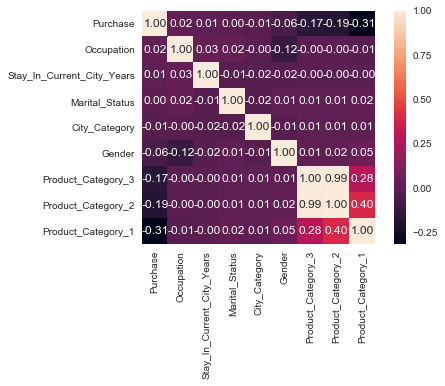

        User_ID  Gender Age  Occupation  City_Category  \
0       1000001       3   0          10              5   
1       1000001       3   0          10              5   
2       1000001       3   0          10              5   
3       1000001       3   0          10              5   
4       1000002       2   6          16              4   
5       1000003       2   2          15              5   
6       1000004       2   4           7              3   
7       1000004       2   4           7              3   
8       1000004       2   4           7              3   
9       1000005       2   2          20              5   
10      1000005       2   2          20              5   
11      1000005       2   2          20              5   
12      1000005       2   2          20              5   
13      1000005       2   2          20              5   
14      1000006       3   5           9              5   
15      1000006       3   5           9              5   
16      100000

In [73]:
numeric_features = data.select_dtypes(include=[np.number])



corr = numeric_features.corr()
correlation = data.corr(method='pearson')
columns = correlation.nlargest(10, "Purchase").index

correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()
print(data)

In [74]:
# Data normalization 
Y_reserv = data.Purchase
data = data.drop(["Purchase"], axis=1)
Y_for_regression = (Y_reserv - Y_reserv.min())/(Y_reserv.max() - Y_reserv.min())
data["Purchase"] = Y_for_regression

In [65]:
print(data)

        User_ID  Gender Age  Occupation  City_Category  \
0       1000001       3   0          10              5   
1       1000001       3   0          10              5   
2       1000001       3   0          10              5   
3       1000001       3   0          10              5   
4       1000002       2   6          16              4   
5       1000003       2   2          15              5   
6       1000004       2   4           7              3   
7       1000004       2   4           7              3   
8       1000004       2   4           7              3   
9       1000005       2   2          20              5   
10      1000005       2   2          20              5   
11      1000005       2   2          20              5   
12      1000005       2   2          20              5   
13      1000005       2   2          20              5   
14      1000006       3   5           9              5   
15      1000006       3   5           9              5   
16      100000

In [66]:
#Stay_In_Current_City_Years to binary
print(data)

        User_ID  Gender Age  Occupation  City_Category  \
0       1000001       3   0          10              5   
1       1000001       3   0          10              5   
2       1000001       3   0          10              5   
3       1000001       3   0          10              5   
4       1000002       2   6          16              4   
5       1000003       2   2          15              5   
6       1000004       2   4           7              3   
7       1000004       2   4           7              3   
8       1000004       2   4           7              3   
9       1000005       2   2          20              5   
10      1000005       2   2          20              5   
11      1000005       2   2          20              5   
12      1000005       2   2          20              5   
13      1000005       2   2          20              5   
14      1000006       3   5           9              5   
15      1000006       3   5           9              5   
16      100000

In [67]:
# Predictors from matrix of corelations !!!!
target = 'Purchase'
train_df, test_df, Y_train, Y_test =  train_test_split (data, data[target], test_size = 0.20, random_state=42)
predictors = train_df.columns.drop(['Purchase','User_ID']) #'Product_ID'
# function for training/trying diferent model
def modelfit(alg, dtrain, dtest, predictors, target):
    X_train = dtrain[predictors]
    Y_train = dtrain[target]
    X_test = dtest[predictors]
    Y_test = dtest[target]
    
    alg.fit(X_train, dtrain[target])
    dtrain_predictions = alg.predict(X_train)

    cv_score = cross_validate(alg, X_train,(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score['fit_time']))
    
    #Print model report:
    print("Model Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    y_pred = alg.predict(X_test)
    y_true = np.array(dtest[target])
    print(alg.score(X_test,Y_test))
    return alg

In [68]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
LR_model = modelfit(LR, train_df, test_df, predictors, target)

Model Report
RMSE : 0.1952
CV Score : Mean - 0.661 | Std - 0.0106 | Min - 0.6417 | Max - 0.6743
0.12721034505877182


In [69]:
from sklearn.tree import DecisionTreeRegressor
model_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model_DecisionTreeRegressor = modelfit(model_DecisionTreeRegressor, train_df, test_df, predictors, target)

Model Report
RMSE : 0.1241
CV Score : Mean - 1.094 | Std - 0.0128 | Min - 1.08 | Max - 1.13
0.6398236458152828


In [70]:
from sklearn.linear_model import Ridge
model_Ridge = Ridge(alpha=0.05,normalize=True)
model_Ridge = modelfit(model_Ridge, train_df, test_df, predictors, target)

Model Report
RMSE : 0.1973
CV Score : Mean - 0.5997 | Std - 0.01921 | Min - 0.5725 | Max - 0.6448
0.10853361758384417


In [71]:
Lasso = linear_model.Lasso(alpha=0.1)
model_Lasso = modelfit(Lasso, train_df, test_df, predictors, target)

Model Report
RMSE : 0.2006
CV Score : Mean - 0.6626 | Std - 0.01463 | Min - 0.6323 | Max - 0.6839
0.08086584970452504


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(model_DecisionTreeRegressor,k_features=13,forward=True,floating=False,verbose=2,scoring='neg_mean_squared_error',cv=5)
sfs1 = sfs1.fit(train_df[predictors], train_df[target])
print(list(sfs1.k_feature_idx_))
lst = list(sfs1.k_feature_idx_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    3.8s finished

[2019-01-28 11:32:36] Features: 1/13 -- score: -0.016330923263983565[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   10.7s finished

[2019-01-28 11:32:47] Features: 2/13 -- score: -0.015993463213289132[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   16.7s finished

[2019-01-28 11:33:03] Features: 3/13 -- score: -0.01585877771249817[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]

In [72]:
print("Final model")
model1 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
final_model = modelfit(model1, train_df, test_df, pd.core.indexes.base.Index(sfs1.subsets_[4]['feature_names']), target)

Final model
Model Report
RMSE : 0.1255
CV Score : Mean - 0.7028 | Std - 0.0378 | Min - 0.6766 | Max - 0.837
0.6376390775126682
